# Data retrieval

In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [0]:
url = 'https://inshorts.com/en/read/world'

In [0]:
news_data = []

In [4]:
news_category = url.split('/')
news_category

['https:', '', 'inshorts.com', 'en', 'read', 'world']

In [0]:
news_category = news_category[-1]

In [6]:
data = requests.get(url)
data.content

b'<!doctype html>\n<html lang="en">\n\n<head>\n  <meta charset="utf-8" />\n  <style>\n    /* The Modal (background) */\n    .modal_contact {\n        display: none; /* Hidden by default */\n        position: fixed; /* Stay in place */\n        z-index: 8; /* Sit on top */\n        left: 0;\n        top: 0;\n        width: 100%; /* Full width */\n        height: 100%;\n        overflow: auto; /* Enable scroll if needed */\n        background-color: rgb(0,0,0); /* Fallback color */\n        background-color: rgba(0,0,0,0.4); /* Black w/ opacity */\n    }\n\n    /* Modal Content/Box */\n    .modal-content {\n        background-color: #fefefe;\n        margin: 15% auto;\n        padding: 20px !important;\n        padding-top: 0 !important;\n        /* border: 1px solid #888; */\n        text-align: center;\n        position: relative;\n        border-radius: 6px;\n    }\n\n    /* The Close Button */\n    .close {\n      left: 90%;\n      color: #aaa;\n      float: right;\n      font-size: 

In [0]:
soup = BeautifulSoup(data.content, 'html.parser')

In [0]:
news_articles = [{'news_headline': headline.find('span', attrs={'itemprop': 'headline'}).string,
                  'news_article': article.find('div', attrs={'itemprop': 'articleBody'}).string,
                  'news_category': news_category} 
                 for headline, article in zip(soup.find_all('div', 
                                                            class_ = ['news-card-title news-right-box']), 
                                              soup.find_all('div', class_=['news-card-content news-right-box']))]

In [9]:
news_data.extend(news_articles)
news_data

[{'news_article': 'Donald Trump has become the third US President to be impeached following a vote by House of Representatives. The Senate will now hold a trial on whether to remove Trump from office. The charges of abuse of power and obstruction of Congress were brought against Trump over his alleged attempts to pressure Ukraine to investigate his political rival Joe Biden.',
  'news_category': 'world',
  'news_headline': 'Donald Trump becomes third US President to be impeached'},
 {'news_article': 'Ahead of the vote in the US House of Representatives, US President Donald Trump tweeted, "Can you believe that I\'ll be impeached today by the...Do Nothing Democrats, AND I DID NOTHING WRONG!" "This shoild never happen to another President again. Say a prayer!" he wrote. Trump later deleted the tweet and wrote another tweet with the correct spelling of \'should\'.',
  'news_category': 'world',
  'news_headline': 'I will be impeached today: Donald Trump'},
 {'news_article': 'The US House of

In [0]:
df = pd.DataFrame(news_data)

In [0]:
df = df[['news_headline', 'news_article', 'news_category']]

In [12]:
df.head(3)

,news_headline,news_article,news_category
0,Donald Trump becomes third US President to be ...,Donald Trump has become the third US President...,world
1,I will be impeached today: Donald Trump,Ahead of the vote in the US House of Represent...,world
2,What is the procedure to impeach the President...,"The US House of Representatives, the lower hou...",world


# Prepare user defined function to extract data from inshorts.com

In [0]:
urls_list = ['https://inshorts.com/en/read/travel',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

In [0]:
def datasetPrepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        news_articles = [{'news_headline': headline.find('span', attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles) 
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df    

In [0]:
news_df = datasetPrepare(urls_list)

In [16]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
news_headline    75 non-null object
news_article     75 non-null object
news_category    75 non-null object
dtypes: object(3)
memory usage: 1.9+ KB


In [17]:
news_df.head(5)

,news_headline,news_article,news_category
0,Japan hotel offers room for ₹66 to guests read...,A hotel in Japan named Business Ryokan Asahi i...,travel
1,"UK family books 5-star hotel in Egypt, reaches...",A UK family that booked a five-star hotel in E...,travel
2,"IndiGo airline systems down across India, like...",The IndiGo airline on Monday said that its sys...,travel
3,Statue of Unity surpasses Statue of Liberty in...,The Statue of Unity in Gujarat has surpassed t...,travel
4,Delhi's Khan Market world's 20th most expensiv...,Delhi's Khan Market is the world's 20th most e...,travel


In [18]:
news_df.news_category.value_counts()

world     25
sports    25
travel    25
Name: news_category, dtype: int64

# Text Wrangling and Pre-processing

In [0]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

In [0]:
nlp = spacy.load('en')

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

## Remove HTML tags

In [23]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

## Remove accented characters

In [24]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

## Remove special characters

In [0]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [26]:
remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

## Text lemmatization

In [0]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [28]:
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crashed yesterday , ours crash daily'

## Text stemming

In [29]:
def simple_stemming(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemming("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

## Remove stopwords

In [0]:
def rem_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [31]:
rem_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

## Building a text normalizer

In [0]:
def normalized_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = rem_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

## Pre-process and normalize news articles

In [0]:
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

In [34]:
news_df['clean_text'] = normalized_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'clean_text': 'uk family book star hotel egypt reach find not build uk family book five star hotel egypt august reach find never build family shift another hotel process demolish complain poor facility well get accommodation third hotel take hold deposit',
 'full_text': "UK family books 5-star hotel in Egypt, reaches there to find it wasn't built. A UK family that booked a five-star hotel in Egypt in August reached there to find that it had never been built. The family was shifted to another hotel which was in the process of being demolished. On complaining about the poor facilities there as well, they got accommodation in a third hotel which took £8,000 as holding deposit."}

# Save the news articles

In [0]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

In [36]:
#The following command is needed only if our data is uploaded to Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp "news.csv" "/content/drive/My Drive/classNotes/statisticalNLP/dseNLP"

# Tagging Parts of Speech

In [0]:
news_df = pd.read_csv('/content/drive/My Drive/classNotes/statisticalNLP/dseNLP/news.csv')

In [39]:
corpus = normalized_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)
sentence_nlp

UK family books 5-star hotel in Egypt, reaches there to find it wasn't built

In [40]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

,Word,POS tag,Tag type
0,UK,NNP,PROPN
1,family,NN,NOUN
2,books,NNS,NOUN
3,5-star,CD,NUM
4,hotel,NN,NOUN
5,in,IN,ADP
6,Egypt,NNP,PROPN
7,",",",",PUNCT
8,reaches,VBZ,VERB
9,there,RB,ADV


In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [43]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())

In [45]:
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,UK,NNP
1,family,NN
2,books,NNS
3,5-star,JJ
4,hotel,NN
5,in,IN
6,"Egypt,",NNP
7,reaches,NNS
8,there,RB
9,to,TO


# Named Entity Recognition

In [0]:
sentence = str(news_df.iloc[1].full_text)

In [47]:
sentence

"UK family books 5-star hotel in Egypt, reaches there to find it wasn't built. A UK family that booked a five-star hotel in Egypt in August reached there to find that it had never been built. The family was shifted to another hotel which was in the process of being demolished. On complaining about the poor facilities there as well, they got accommodation in a third hotel which took £8,000 as holding deposit."

In [0]:
sentence_nlp = nlp(sentence)

In [49]:
sentence_nlp

UK family books 5-star hotel in Egypt, reaches there to find it wasn't built. A UK family that booked a five-star hotel in Egypt in August reached there to find that it had never been built. The family was shifted to another hotel which was in the process of being demolished. On complaining about the poor facilities there as well, they got accommodation in a third hotel which took £8,000 as holding deposit.

In [50]:
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(UK, 'GPE'), (Egypt, 'GPE'), (UK, 'GPE'), (five, 'CARDINAL'), (Egypt, 'GPE'), (August, 'DATE'), (third, 'ORDINAL'), (8,000, 'CARDINAL')]


In [0]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [52]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,India,first,US,Trump,Donald Trump,ODI,Pakistan,two,Indian,Team India,second,Virat Kohli,Japanese,Mumbai,10
Entity Type,GPE,ORDINAL,GPE,ORG,PERSON,ORG,GPE,CARDINAL,NORP,ORG,ORDINAL,PERSON,NORP,GPE,CARDINAL
Frequency,26,15,12,12,10,9,9,7,7,6,6,5,5,5,5


In [53]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,GPE,ORG,PERSON,CARDINAL,DATE,NORP,ORDINAL,LOC,WORK_OF_ART,QUANTITY,MONEY,PERCENT,EVENT,TIME,PRODUCT
Frequency,155,142,124,99,86,52,44,17,7,6,5,4,4,3,3


# Emotion and Sentiment Analysis

In [77]:
!pip install afinn

In [0]:
from afinn import Afinn

In [0]:
af = Afinn()

In [0]:
sentiment_scores = [af.score(article) for article in corpus]

In [0]:
#sentiment_scores

In [0]:
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [0]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T

In [0]:
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']

In [0]:
df['sentiment_score'] = df.sentiment_score.astype('float')

In [88]:
df.groupby(by=['news_category']).describe()

sentiment_score                                            
                        count  mean       std   min   25%  50%  75%   max
news_category                                                            
sports                   25.0 -0.48  5.067215 -14.0  -2.0  0.0  2.0   9.0
travel                   25.0  2.64  3.080584  -2.0   0.0  2.0  5.0   8.0
world                    25.0 -4.64  9.451102 -18.0 -14.0 -4.0  0.0  14.0

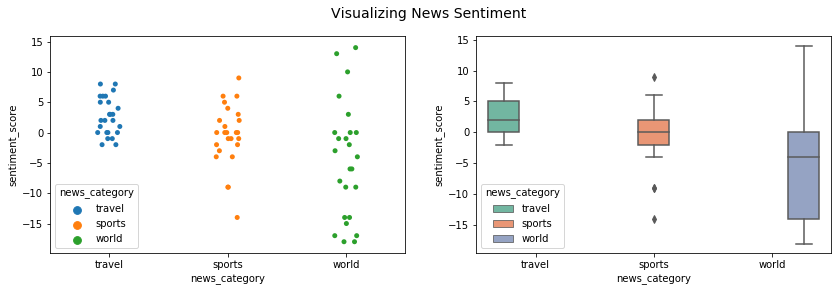

In [89]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score",  hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


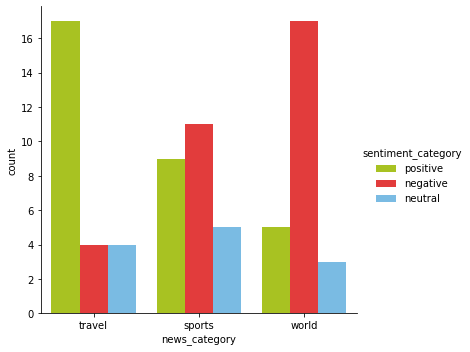

In [90]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [0]:
pos_idx = df[(df.news_category=='travel') & (df.sentiment_score == 2)].index[0]

In [0]:
neg_idx = df[(df.news_category=='travel') & (df.sentiment_score == -2)].index[0]

In [93]:
print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Tech News Article: A UK family that booked a five-star hotel in Egypt in August reached there to find that it had never been built. The family was shifted to another hotel which was in the process of being demolished. On complaining about the poor facilities there as well, they got accommodation in a third hotel which took £8,000 as holding deposit.

Most Positive Tech News Article: The IndiGo airline on Monday said that its systems were down across the entire network and added that it could impact operations across the airports. IndiGo tweeted, "Our systems are down across the network. We are expecting the counters to be crowded more than usual." The airline said that efforts were being made to resolve the issue at the earliest.


In [94]:
df1 = df[df.news_category=='world']
pd.unique(df1.sentiment_score)

array([ -8.,  -2.,   6.,  13.,  10.,  -1.,   0.,  14., -14., -18., -17.,
        -3.,  -9.,  -6., -15.,  -4.,   3.])

In [95]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score >= 2)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score <= -2.)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: Donald Trump has become the third US President to be impeached following a vote by House of Representatives. The Senate will now hold a trial on whether to remove Trump from office. The charges of abuse of power and obstruction of Congress were brought against Trump over his alleged attempts to pressure Ukraine to investigate his political rival Joe Biden.

Most Positive World News Article: The US House of Representatives, the lower house of US Congress, debates and votes on impeachment articles against the President. After voting in favour of impeaching him/her, the matter moves to Senate where Supreme Court Chief Justice presides over the trial. Removing the President from office would require a two-thirds majority of those present and voting in the 100-member Senate.


In [0]:
from textblob import TextBlob

In [0]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]

In [0]:
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [99]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                     ...                    
                        count     mean       std  ...    50%    75%   max
news_category                                     ...                    
sports                   25.0  0.08516  0.156895  ...  0.075  0.158  0.52
travel                   25.0  0.05692  0.174073  ...  0.094  0.154  0.48
world                    25.0  0.06284  0.280212  ...  0.000  0.260  0.80

[3 rows x 8 columns]

In [74]:
df.head()

,news_category,sentiment_score,sentiment_category
0,travel,0.084,positive
1,travel,-0.200,negative
2,travel,-0.037,negative
3,travel,-0.012,negative
4,travel,-0.067,negative


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


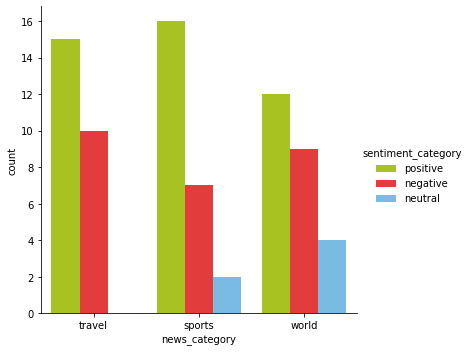

In [100]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [102]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score > 0.)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score < -0.)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: Ahead of the vote in the US House of Representatives, US President Donald Trump tweeted, "Can you believe that I'll be impeached today by the...Do Nothing Democrats, AND I DID NOTHING WRONG!" "This shoild never happen to another President again. Say a prayer!" he wrote. Trump later deleted the tweet and wrote another tweet with the correct spelling of 'should'.

Most Positive World News Article: Hollywood actress Jane Fonda said she attempted to meet US President Donald Trump after his election with a group of "beautiful, voluptuous, brilliant" climate activists, including Pamela Anderson, in order to convince him to tackle global warming. "I kind of know men like Trump, not as bad, but you know, I sort of know those inclinations," the 81-year-old added.
